In [1]:
# Import Libaries and Tools
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import re

plt.rcParams.update({'font.size': 12})

ROOT_DIR = os.path.abspath("../../")

In [2]:
# Key Varibles
cr = 'CR2133'

# Data Summary
datasetFile = 'Results/' + cr + '.csv.intInvStats.npz'

In [3]:
# open and retreave data
data = np.load(datasetFile, allow_pickle=True)
lst = data.files

sucess = data[lst[0]]
alphas = data[lst[1]]
IOU    = data[lst[2]]
SSIM   = data[lst[3]]
GCE    = data[lst[4]]
LCE    = data[lst[5]]

In [4]:
# Formatting
ScalingTypes = ['LinearCompressFull.','LinearCompressFullRestored.','LinearCompress1toMax.',
                'LinearCompress0toMaxRestored.','LinearCompressSolarLimits.','LinearCompressSolarLimitsRestored.',
                'LinearCompressDefault.','LinearCompressDefaultRestored.','Log10CompressFull.',
                'Log10CompressFullRestored.','Log10Compress1toMax.','Log10Compress1toMaxRestored.',
                'Log10CompressSolarLimits.','Log10CompressSolarLimitsRestored.',
                'Log10CompressDefault.','Log10CompressDefaultRestored.']
# Format Keys
keysFormated = ['Linear\nFull','Linear\nFull\nRestored','Linear\n0 to Max',
                'Linear\n0 to Max\nRestored','Linear\nSolar Limits','Linear\nSolar Limits\nRestored',
                'Linear\nDefault','Linear\nDefault\nRestored','Log10\nFull','Log10\nFull\nRestored',
                'Log10\n0 to Max','Log10\n0 to Max\nRestored','Log10\nSolar Limits',
                'Log10\nSolar Limits\nRestored','Log10\nDefault','Log10\nDefault\nRestored']

In [5]:
# Determin how many times ACWE failed to generate a segmentation
Error  = np.where(sucess==0)[1]
error = np.zeros(len(keysFormated))
for e in Error:
    error[e] = error[e] + 1

# Determin how many times ACWE returned an empty segmentation
Colaps = np.where(sucess==0.5)[1]
colaps = np.zeros(len(keysFormated))
for c in Colaps:
    colaps[c] = colaps[c] + 1

# Print Results
for i in range(len(ScalingTypes)):
    print(ScalingTypes[i])
    print('    Errors:',error[i],'(',error[i]/len(sucess)*100,'%)')
    print('    Empty Seg:',colaps[i],'(',colaps[i]/len(sucess)*100,'%)')
    print()

LinearCompressFull.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 2.0 ( 0.3236245954692557 %)

LinearCompressFullRestored.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 1.0 ( 0.16181229773462785 %)

LinearCompress1toMax.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 0.0 ( 0.0 %)

LinearCompress0toMaxRestored.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 0.0 ( 0.0 %)

LinearCompressSolarLimits.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 0.0 ( 0.0 %)

LinearCompressSolarLimitsRestored.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 0.0 ( 0.0 %)

LinearCompressDefault.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 0.0 ( 0.0 %)

LinearCompressDefaultRestored.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 1.0 ( 0.16181229773462785 %)

Log10CompressFull.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 618.0 ( 100.0 %)

Log10CompressFullRestored.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 0.0 ( 0.0 %)

Log10Compress1toMax.
    Errors: 0.0 ( 0.0 %)
    Empty Seg: 618.0 ( 100.0 %)

Log10Compress1toMaxRestored.
    Errors: 0.0 ( 0.0 %)
    Empty Seg:

In [6]:
# Filter

# Filter out completly empty cases 
IOUsimplified  = np.delete(IOU,10,axis=1)
IOUsimplified  = np.delete(IOUsimplified,8,axis=1)

SSIMsimplified = np.delete(SSIM,10,axis=1)
SSIMsimplified = np.delete(SSIMsimplified,8,axis=1)

GCEsimplified  = np.delete(GCE,10,axis=1)
GCEsimplified  = np.delete(GCEsimplified,8,axis=1)

LCEsimplified  = np.delete(LCE,10,axis=1)
LCEsimplified  = np.delete(LCEsimplified,10,axis=1)

# Filter Out NaNs (a NaN is present iff no segmentation is generated)
maskIOU      = ~np.isnan(IOUsimplified)
IOUfiltered  = [d[m] for d, m in zip(IOUsimplified.T, maskIOU.T)]

maskSSIM     = ~np.isnan(SSIMsimplified)
SSIMfiltered = [d[m] for d, m in zip(SSIMsimplified.T,maskSSIM.T)]

maskGCE      = ~np.isnan(GCEsimplified)
GCEfiltered  = [d[m] for d, m in zip(GCEsimplified.T, maskGCE.T)]

maskLCE      = ~np.isnan(LCEsimplified)
LCEfiltered  = [d[m] for d, m in zip(LCEsimplified.T, maskLCE.T)]

In [7]:
# Ensure Folder Exists
saveDirectory = '/Figures/IntConstancy/'
saveDirectory = ROOT_DIR + saveDirectory

if not os.path.exists(saveDirectory):
    os.makedirs(saveDirectory)

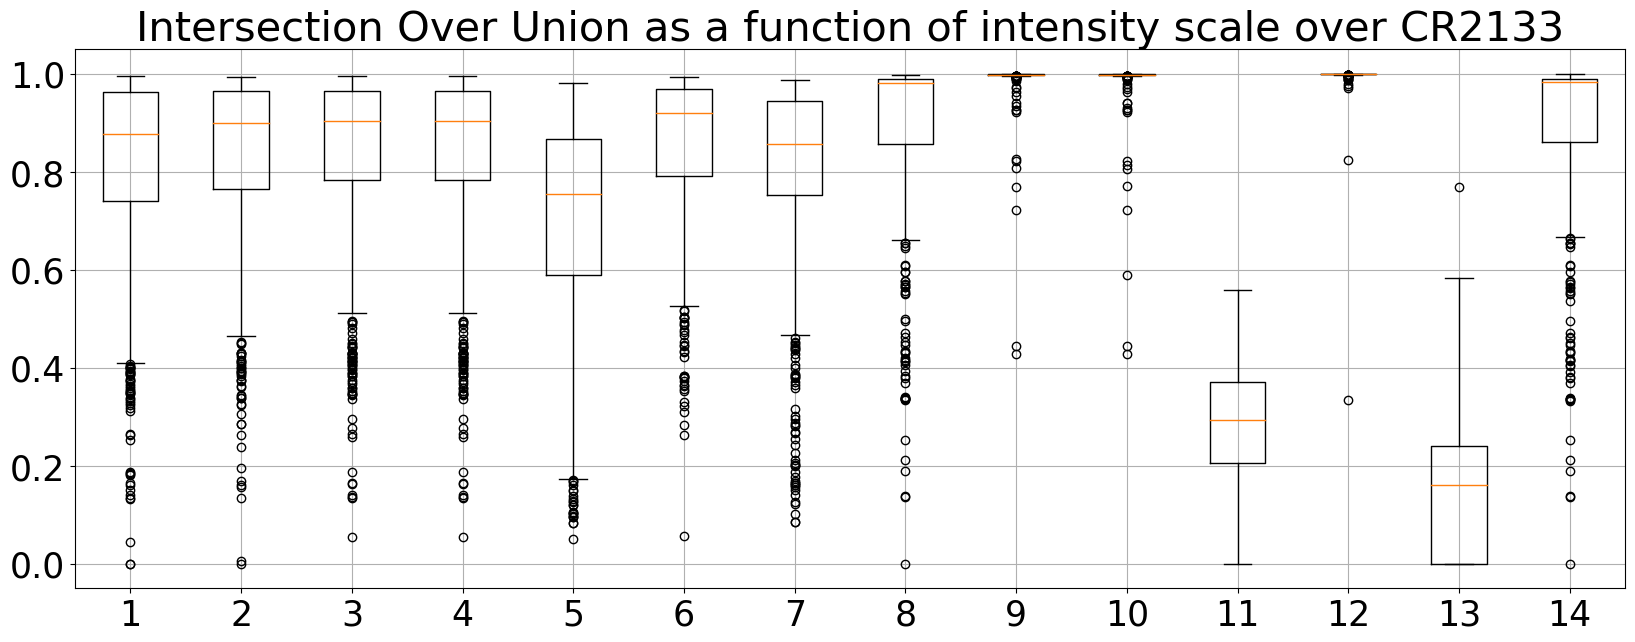

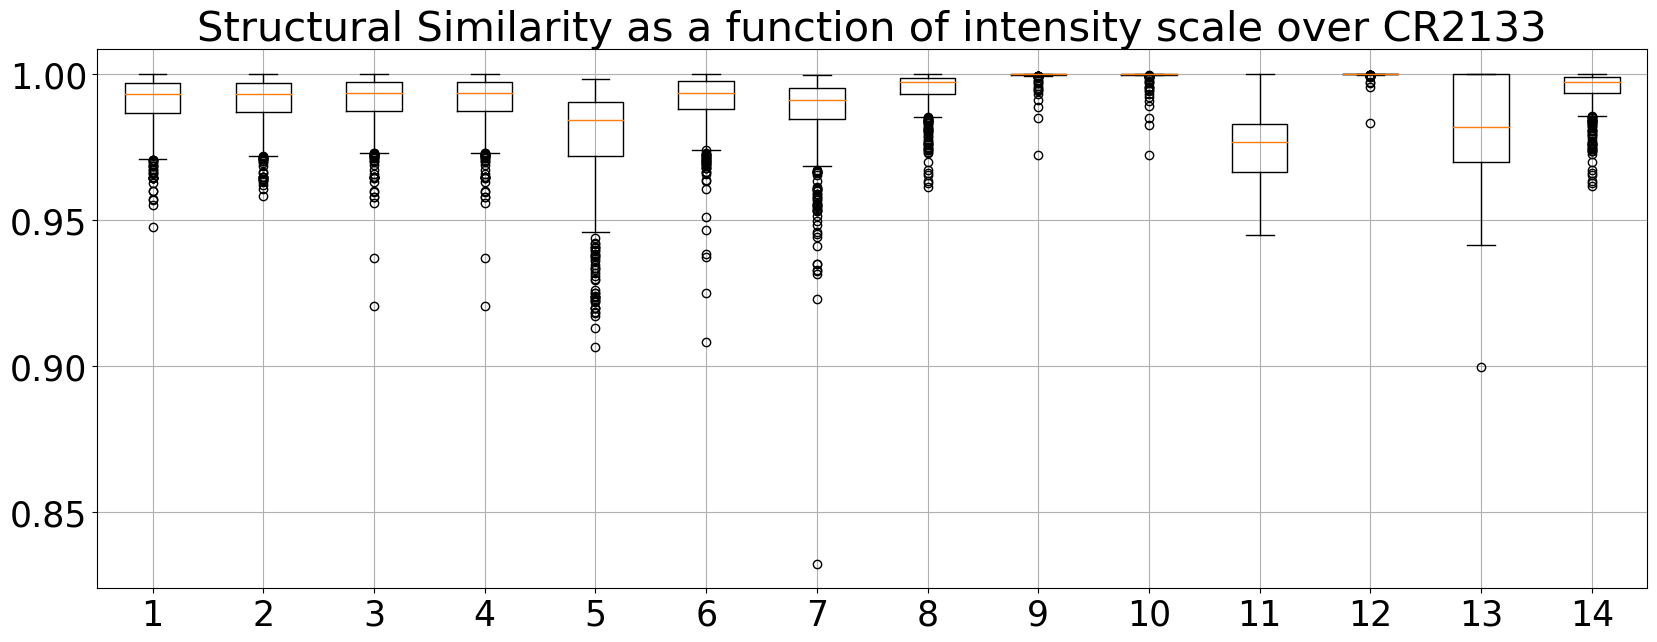

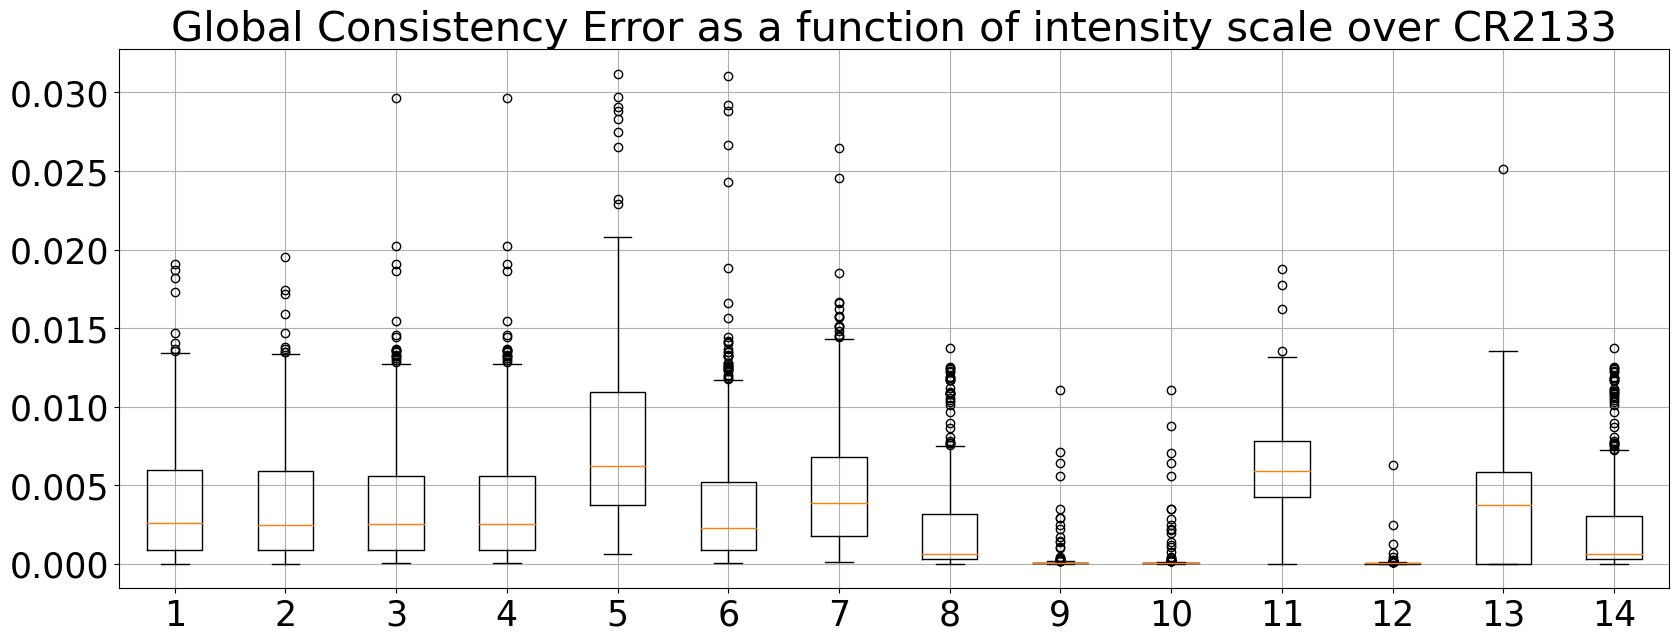

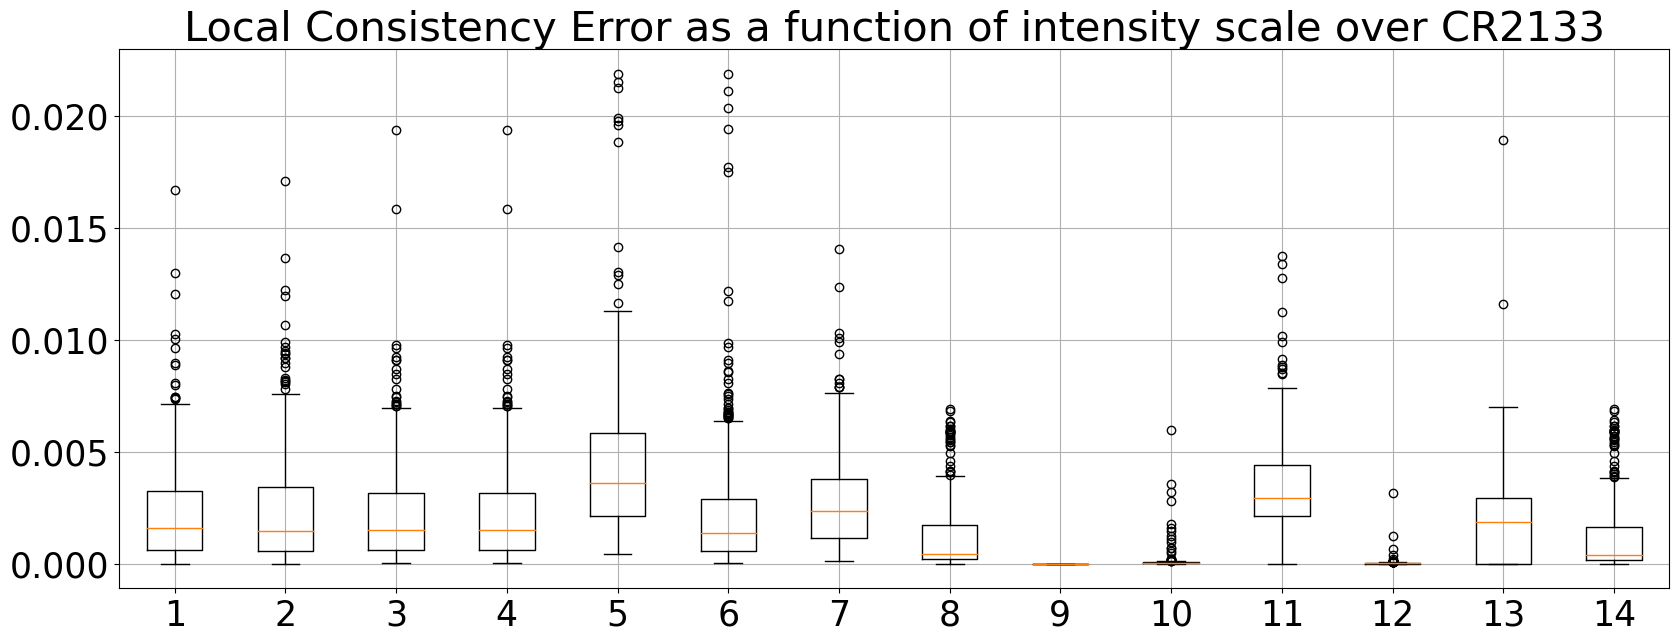

In [8]:
# Set up lables
x = np.arange(len(keysFormated)) + 1

plt.figure(figsize=[20,7])
plt.rcParams.update({'font.size': 25})
title = 'Intersection Over Union as a function of intensity scale over CR' + cr[2:]
plt.boxplot(IOUfiltered)
plt.title(title)
#plt.xticks(x,keysFormated)
plt.grid()
title='IOU_Box_'+cr+'.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()

plt.figure(figsize=[20,7])
plt.rcParams.update({'font.size': 25})
title = 'Structural Similarity as a function of intensity scale over CR' + cr[2:]
plt.boxplot(SSIMfiltered)
plt.title(title)
#plt.xticks(x,keysFormated)
plt.grid()
title='SSIM_Box_'+cr+'.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()

plt.figure(figsize=[20,7])
plt.rcParams.update({'font.size': 25})
title = 'Global Consistency Error as a function of intensity scale over CR' + cr[2:]
plt.boxplot(GCEfiltered)
plt.title(title)
#plt.xticks(x,keysFormated)
plt.grid()
title='GCE_Box_'+cr+'.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()

plt.figure(figsize=[20,7])
plt.rcParams.update({'font.size': 25})
title = 'Local Consistency Error as a function of intensity scale over CR' + cr[2:]
plt.boxplot(LCEfiltered)
plt.title(title)
#plt.xticks(x,keysFormated)
plt.grid()
title='LCE_Box_'+cr+'.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()